In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
plt.style.use('ggplot')

In [ ]:
# We use stock dataset from PTT
ptt=pd.read_csv('/content/drive/MyDrive/PTT.BK.csv')
ptt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-15,41.75,42.00,41.00,41.25,39.222187,80602500
1,2021-03-16,41.25,41.25,40.50,40.75,38.746765,63962400
2,2021-03-17,40.50,40.75,40.00,40.50,38.509056,94213200
3,2021-03-18,40.75,41.25,40.50,40.50,38.509056,48932200
4,2021-03-19,40.00,40.50,39.75,40.50,38.509056,80270400


In [ ]:
ptt.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
238,2022-03-09,38.50,38.75,38.00,38.75,38.75,81740400
239,2022-03-10,38.50,38.75,38.25,38.75,38.75,64666100
240,2022-03-11,38.50,39.75,38.25,39.50,39.50,89337900
241,2022-03-14,39.25,39.50,39.25,39.50,39.50,24802800
242,2022-03-15,38.75,39.00,38.25,38.75,38.75,60174700


In [ ]:
print(f"We have {len(ptt.index)} datas.")

We have 243 datas.


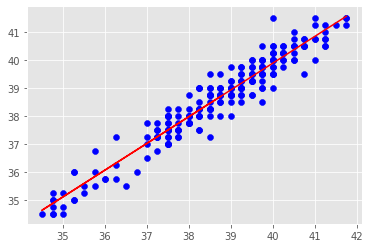

In [ ]:
reg = np.polyfit(ptt['Open'],ptt['Close'],deg=1)
tend = np.polyval(reg,ptt['Open'])
plt.scatter(x=ptt['Open'],y=ptt['Close'],color='Blue')
plt.plot(ptt['Open'], tend, 'r');

In [ ]:
# Drop the columns that we don't use
ptt.drop(['Date'], axis = 1, inplace = True)
ptt.drop(['Adj Close'], axis = 1, inplace = True)
ptt.drop(['Volume'], axis = 1, inplace = True)
ptt.head()

,Open,High,Low,Close
0,41.75,42.00,41.00,41.25
1,41.25,41.25,40.50,40.75
2,40.50,40.75,40.00,40.50
3,40.75,41.25,40.50,40.50
4,40.00,40.50,39.75,40.50


In [ ]:
# Define x and y
# y is what column do we want to predict
# x is the other columns except the one we want to predict
x=ptt.drop(['Close'], axis=1)
y=ptt['Close']
print(f"x---------------------------{len(x)}\n{x.head()}")
print(f"y---------------------------{len(y)}\n{y.head()}")

x---------------------------243
    Open   High    Low
0  41.75  42.00  41.00
1  41.25  41.25  40.50
2  40.50  40.75  40.00
3  40.75  41.25  40.50
4  40.00  40.50  39.75
y---------------------------243
0    41.25
1    40.75
2    40.50
3    40.50
4    40.50
Name: Close, dtype: float64


In [ ]:
# Define x_test, x_train, y_test and y_train data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
print(f"x_test---------------------------{len(x_test)}\n{x_test.head()}")
print(f"x_train---------------------------{len(x_train)}\n{x_train.head()}")
print(f"y_test---------------------------{len(y_test)}\n{y_test.head()}")
print(f"y_train---------------------------{len(y_train)}\n{y_train.head()}")

x_test---------------------------49
      Open   High    Low
65   40.00  40.25  39.50
59   41.00  42.00  40.75
191  37.75  38.25  37.75
111  38.25  38.50  37.50
112  37.50  38.25  37.25
x_train---------------------------194
      Open   High    Low
29   39.75  40.75  39.50
42   39.75  39.75  38.75
115  37.75  38.25  37.50
165  38.00  38.25  37.50
221  40.25  40.50  40.00
y_test---------------------------49
65     40.00
59     41.25
191    38.25
111    37.50
112    38.00
Name: Close, dtype: float64
y_train---------------------------194
29     40.50
42     39.00
115    37.50
165    37.75
221    40.25
Name: Close, dtype: float64


In [ ]:
# Define test and train data
test = pd.concat([x_test, y_test], axis = 1)
train = pd.concat([x_train, y_train], axis = 1)
print(f"test---------------------------{len(test)}\n{test.head()}")
print(f"train---------------------------{len(train)}\n{train.head()}")

test---------------------------49
      Open   High    Low  Close
65   40.00  40.25  39.50  40.00
59   41.00  42.00  40.75  41.25
191  37.75  38.25  37.75  38.25
111  38.25  38.50  37.50  37.50
112  37.50  38.25  37.25  38.00
train---------------------------194
      Open   High    Low  Close
29   39.75  40.75  39.50  40.50
42   39.75  39.75  38.75  39.00
115  37.75  38.25  37.50  37.50
165  38.00  38.25  37.50  37.75
221  40.25  40.50  40.00  40.25


In [ ]:
# Create model for linear regression and train the model
model = LinearRegression()
model.fit(x_train.values,y_train.values) # training the model
rfe=RFE(model,n_features_to_select=6)
rfe = rfe.fit(x_train.values, y_train.values)

In [ ]:
# Predict the test data
pred = rfe.predict(x_test.values)
pred

array([39.77142239, 41.54698989, 38.09946116, 37.85194811, 37.8702264 ,
       38.05149223, 38.21447976, 37.65160154, 35.11967523, 35.86542416,
       38.34777665, 39.79130558, 35.3017435 , 36.2279558 , 37.08792089,
       37.28826745, 39.45605723, 34.42350012, 37.22121778, 37.89911459,
       38.77816042, 39.83766962, 38.28152943, 37.96616426, 39.2930697 ,
       38.99678528, 38.71111075, 40.4493192 , 38.66314182, 38.57781385,
       40.20100371, 39.77142239, 40.89798126, 39.57107583, 39.72345346,
       34.9384094 , 38.71111075, 39.5231069 , 40.26805338, 39.45605723,
       38.28152943, 40.40135027, 37.26918671, 37.73773196, 37.55646613,
       38.89317901, 39.02647591, 38.28152943, 39.70437272])

In [ ]:
# Compare the actual test value and the predicted value
pred_concat = pd.concat([y_test.reset_index(),pd.Series(pred, name = "Predicted")],axis=1)
pred_concat.head()

,index,Close,Predicted
0,65,40.00,39.771422
1,59,41.25,41.546990
2,191,38.25,38.099461
3,111,37.50,37.851948
4,112,38.00,37.870226


In [ ]:
# Sort the index
concat_sorted = pred_concat.sort_values(["index"], ascending=True)
print(concat_sorted)

    index  Close  Predicted
32      3  40.50  40.897981
46     19  39.00  39.026476
26     26  38.75  38.711111
11     31  39.50  39.791306
34     32  39.75  39.723453
39     41  39.75  39.456057
20     46  38.75  38.778160
1      59  41.25  41.546990
48     62  39.75  39.704373
30     64  40.00  40.201004
0      65  40.00  39.771422
16     69  39.25  39.456057
44     75  37.25  37.556466
18     81  37.50  37.221218
9      83  35.75  35.865424
13     85  36.25  36.227956
12     88  35.50  35.301743
35     96  34.75  34.938409
17     97  34.50  34.423500
8      99  35.25  35.119675
40    110  38.25  38.281529
3     111  37.50  37.851948
4     112  38.00  37.870226
24    125  39.50  39.293070
41    128  40.50  40.401350
37    140  39.50  39.523107
21    142  40.00  39.837670
6     150  38.00  38.214480
23    152  38.00  37.966164
7     160  37.50  37.651602
5     161  38.00  38.051492
10    163  38.00  38.347777
15    182  37.50  37.288267
14    185  37.00  37.087921
42    186  37.50  37

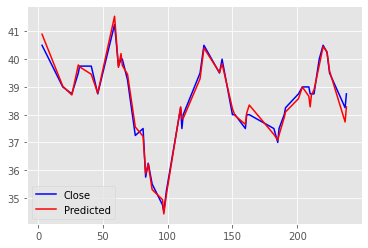

In [ ]:
# Plot the graph to compare the actual and predicted values
plt.plot(concat_sorted['index'],concat_sorted['Close'],color='Blue',label='Close')
plt.plot(concat_sorted['index'],concat_sorted['Predicted'],color='Red',label='Predicted')
plt.legend(loc='lower left')
plt.plot();

In [ ]:
# Convert y_test to array
y_test_array = y_test.to_numpy()

In [ ]:
y_test_array[1]-pred[1]

-0.2969898862097864

In [ ]:
# Mean Squared Error estimation
i=0
MSE=0
for i in range(len(y_test)):
  MSE = MSE+((pred[i]-y_test_array[i])**2)
MSE = MSE/len(y_test)
print("MSE:",MSE)

MSE: 0.04738933111684661


In [ ]:
# Root Mean Squared Error estimation
RMSE = math.sqrt(MSE)
print("RMSE:",RMSE)

RMSE: 0.2176909072902371


In [ ]:
# Mean Absolute Error estimation
i=0
MAE = 0
for i in range(len(y_test)):
  MAE = MAE+(abs(pred[i]-y_test_array[i]))
MAE = MAE/len(y_test)
print("MAE:",MAE)

MAE: 0.1733680441076399


In [ ]:
# r2 score
r2_score(y_test,pred)

0.9797568324491307

In [ ]:
# Create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]

# Call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Fit the model
model_cv.fit(x_train, y_train)                  


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression(),
                           n_features_to_select=6),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004398,0.001737,0.001889,0.000675,1,{'n_features_to_select': 1},0.940408,0.965136,0.977857,0.981527,...,0.963387,0.015486,3,0.973040,0.969040,0.965715,0.965664,0.970822,0.968856,0.002879
1,0.003055,0.000351,0.001574,0.000121,2,{'n_features_to_select': 2},0.949414,0.973848,0.981343,0.981994,...,0.968090,0.013811,2,0.976814,0.972393,0.970542,0.971098,0.975754,0.973320,0.002516
2,0.002266,0.000518,0.001741,0.000580,3,{'n_features_to_select': 3},0.967783,0.980573,0.981405,0.983162,...,0.975505,0.007716,1,0.980560,0.978129,0.978304,0.978061,0.980959,0.979203,0.001280


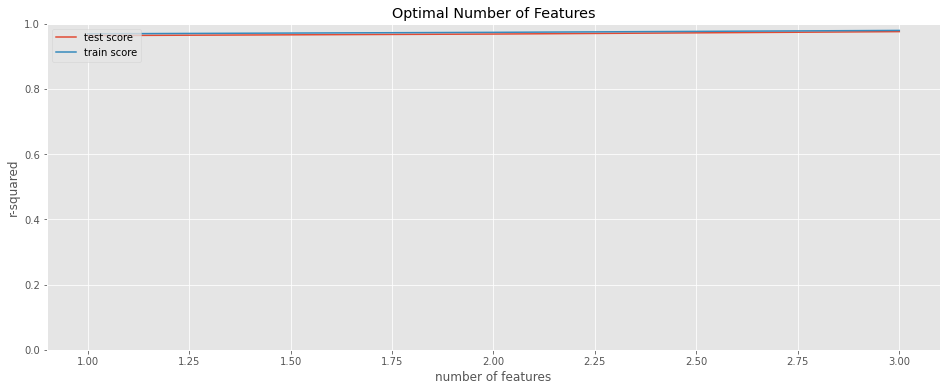

In [ ]:
# Plotting cv results
plt.figure(figsize=(16,6))

plt.ylim([0,1])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [ ]:
op=input('Enter the opening price: ')
print(f'Opening price is {op}.\n')
hi=input('Enter the high price: ')
print(f'High price is {hi}.\n')
lo=input('Enter the low price: ')
print(f'Low price is {lo}.\n')
clo=rfe.predict(np.array([[op,hi,lo]],dtype=float))
print(f'Predicted closing price is {clo[0]}.')

Enter the opening price: 37.5
Opening price is 37.5.

Enter the high price: 37.75
High price is 37.75.

Enter the low price: 37
Low price is 37.

Predicted closing price is 37.28826745093191.
